In [1]:
import deorbit
import numpy as np
import matplotlib.pyplot as plt
from deorbit.utils.dataio import load_sim_data, load_sim_config
from deorbit.utils.plotting import plot_trajectories, plot_height, plot_trajectories_on_map

This example notebook exists to demonstrate the 3D simulation functionality. The simulator has been initialised using the runge kutta 4th order numerical integration method and the coesa atmos fast atmospheric model.

In [2]:
save_path = "eg/sim_example_3D/" #take care to delete this data file when making changes to initial set up

sim_data = load_sim_data(save_path)
sim_config = load_sim_config(save_path)

#this takes roughly 10 seconds
if sim_data is None or sim_config is None:
    np.random.seed(42)
    sim = deorbit.simulator.run(
        "RK4",
        "coesa_atmos_fast",
        initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 0, 0, 7820)),
        time_step=2,
    )
    sim_data = sim.gather_data()
    sim_config = sim.export_config()
    sim.save_data(save_path)
else:
    print("Loaded data from file")

Running simulation with RK4 integrator without noise
Ran 13126 iterations at time step of 2.0 seconds
Impacted at [ 6124124.47886333   153247.80665349 -1749634.8593887 ] at velocity [-58.78095704 445.42260941  13.64764811] at simulated time 26252.0s.
Simulation finished in 2.89062 seconds


The trajectories can be plotted for visualisation.

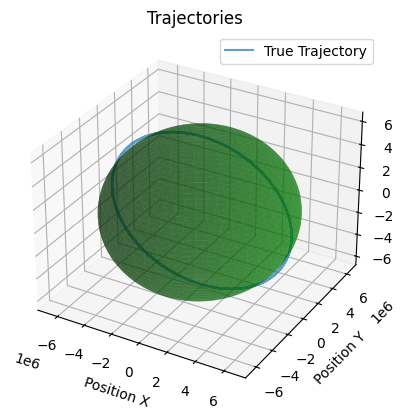

In [3]:
traj = sim_data.state_array()[:, :3]
plot_trajectories(traj)

The height can also be investigated.

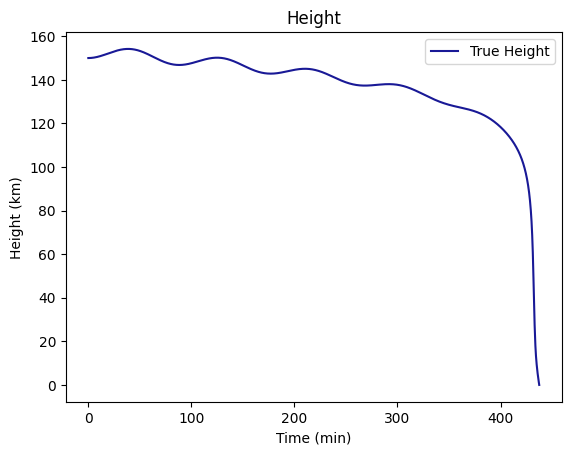

In [4]:
plot_height(traj, sim_data.times)

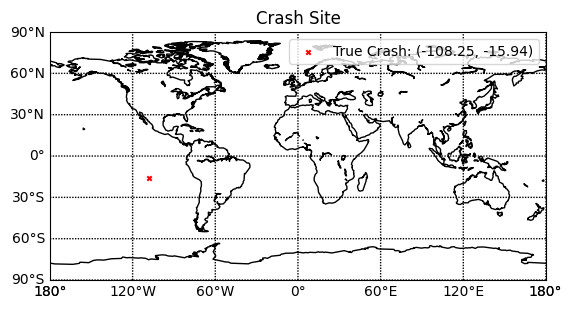

In [5]:
plot_trajectories_on_map(traj, true_times=sim_data.times, only_crash_sites=True)